Lucas Wilson

# A4 Classifying Hand-Drawn Digits

## Overview

Here we look at the difference between fully connected nerual networks and convolutional neural networks. Convolutional networks have a window which looks at part of the data as opposed to the entire image. This can help identify patterns by looking at smaller portions of the image, and it preserves the two dimensional relationship between the input vector. For imaging problems, this is a really useful idea, and we will see that it outperforms the traditional neural network. In this case, the numbers are pretty well centered, but if they were less centered, then the convolutional neural network will identify this shifting much better than the traditional network.

## Provided Code and Data

Download [A4.zip](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A4.zip) and unzip it.  You should have two files, `neuralnetworks_pytorch.py` and `mnist.pkl.gz`. 

Load the data using the following code.

In [1]:
import itertools
import numpy as np
import gzip
import pickle

In [2]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    
Xtrain = train_set[0].reshape((-1, 1, 28, 28))
Ttrain = train_set[1]
Xtest = test_set[0].reshape((-1, 1, 28, 28))
Ttest = test_set[1]

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 1, 28, 28), (50000,), (10000, 1, 28, 28), (10000,))

The second dimension of `Xtrain` and `Xtest` is 1, representing the number of values, or channels, in each pixel.  These images are gray scale so have just one intensity.

Import the provided neural network code.

In [3]:
import neuralnetworks_pytorch as nn
from neuralnetworks_pytorch import NeuralNetworkClassifier_Pytorch
import matplotlib.pyplot as plt

This code defines the class `NeuralNetworkClassifier_Pytorch`.  The constructor for this class accepts the arguments

  * `n_inputs`: (int) number of input components, which is the number of channels for a convolutional net, or the total number of pixels for a fully connected network
  * `n_hiddens_by_layer`: (list of ints) number of units in each hidden layer
  * `n_outputs`: (int) number of classes in the data
  * `relu`: (boolean, default False) if True, relu is used as the activation function. If False, the activation function is tanh
  * `gpu`: (boolean, default False) If True and this machine has a compatible GPU, run the network on the GPU
  * `n_conv_layers`: (int, default 0) 0 to create all layers as fully connected, else create this many convolutional layers as the initial layers in the network
  * `windows`: (list of ints, default [ ]) if all layers are fully connected, this should be empty. If network contains convolutional layers this must be a list of length equal to `n_conv_layers`, with an int for each layer specifying the height and width of the convolution window
  * `strides`: (list of ints, default [ ]) if all layers are fully connected, this should be empty. If network contains convolutional layers this must be a list of length equal to `n_conv_layers`, with an int for each layer specifying the horizontal and vertical stride ofthe convolution window
  * `input_height_width`: (int or None, default value) height and width of input image but only needed for convolutional network

Then train this neural network using the `train` function

  * `Xtrain`: (np.ndarray of floats) training samples along first dimension
  * `Ttrain`: (np.ndarray of longs) one-dimensional vector of integers indicating class of each training sample
  * `Xtest`: (np.ndarray of floats) testing samples along first dimension
  * `Ttest`: (np.ndarray of longs) one-dimensional vector of integers indicating class of each testing sample,
  * `n_iterations`: (int) number of optimization steps, sometimes called epochs
  * `batch_size`: (int) number of samples in each batch to calculate gradient for and update all weights
  * `learning_rate`: (float) factor multiplying gradient to determine step size

Once a neural net is created, with a line like

     nnet = nn.NeuralNetworkClassifier_Pytorch(1, [10, 20, 5], 10, 
               n_conv_layers=2, windows=[5, 7], strides=[1, 2], input_height_width=28)

it can be trained with a line like

     nnet.train(Xtrain, Ttrain, Xtest, Ttest, 200, 100, 0.001)
     
and predictions are made with

     classes, probs = nnet.use(Xtrain)

where `classes` are the predicted classes for each sample and `prob` is the probability of each class for each sample.

To determine the precent of predicted classes that are correct, use the following function.

In [4]:
def percent_correct(actual, predicted):
    return 100 * np.mean(actual == predicted)

## Required Section 1: Fully-Connected Networks (40 points)

1. (15 points) Using `batch_size` of 100, `learning_rate` of 0.001 and `n_hiddens_by_layer` of `[20, 20, 20]`, try a variety of `n_iterations` values and plot the percent of testing data correctly classified versus `n_iterations`.

2. (15 points) Using the best value of `n_iterations`, try at least five different values of `n_hiddens_by_layer` and plot the percent of testing data correctly classified.

3. (10 points) Describe what you see in your plots with at least two sentences for each plot.

### Finding Best n_iterations

In [5]:
def run1(n_iterations):
    nnet = NeuralNetworkClassifier_Pytorch(
        n_inputs=1*28*28,
        n_hiddens_by_layer=[20, 20, 20],
        n_outputs=10,
        #relu=,
        #gpu=,
        #n_conv_layers=,
        #windows=,
        #strides=,
        #input_height_width=,
    )
    nnet.train(
        Xtrain=Xtrain,
        Ttrain=Ttrain,
        Xtest=Xtest,
        Ttest=Ttest,
        n_iterations=n_iterations,
        batch_size=100,
        learning_rate=0.001,
    )
    return nnet

n_iterations_test_values = [1, 10, 20, 50, 60, 70, 80, 100, 150, 200, 300, 500, 750, 1000]
num_it_test_accuracy = []
for n_iterations in n_iterations_test_values:
    print('Using n_iterations:', n_iterations)
    nnet = run1(n_iterations)
    Ytest, _, _ = nnet.use(Xtest)
    num_correct = np.sum(Ytest == Ttest)
    num_it_test_accuracy.append(num_correct / Ytest.shape[0])

Using n_iterations: 1
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 0.8697, acc = 90.82
Using n_iterations: 10
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 0.8258, acc = 91.34
Iteration 2, cost = 0.2951, acc = 93.18
Iteration 3, cost = 0.2270, acc = 94.19
Iteration 4, cost = 0.1930, acc = 94.60
Iteration 5, cost = 0.1706, acc = 95.00
Iteration 6, cost = 0.1543, acc = 95.10
Iteration 7, cost = 0.1414, acc = 95.24
Iteration 8, cost = 0.1309, acc = 95.38
Iteration 9, cost = 0.1222, acc = 95.49
Iteration 10, cost = 0.1149, acc = 95.48
Using n_iterations: 20
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 2, cost = 0.3071, acc = 92.58
Iteration 4, cost = 0.1918, acc = 94.39
Iteration 6, cost = 0.1504, acc = 94.78
Iteration 8, cost = 0.1265, acc = 94.91
Iteration 10, cost = 0.1108, acc = 95.01
Iteration 12, cost = 0.0994, acc = 95.12
Iteration 14, cost = 0.0902, acc = 95.13
Iteration 16, cost = 0.0825, acc = 95.29
Iteration 18, cost = 0.075

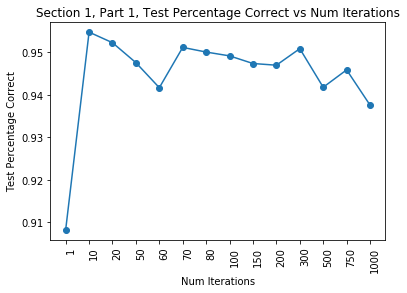

In [38]:
plt.title('Section 1, Part 1, Test Percentage Correct vs Num Iterations')
plt.xlabel('Num Iterations')
plt.ylabel('Test Percentage Correct')
plt.xticks(range(len(n_iterations_test_values)), n_iterations_test_values, rotation=90, horizontalalignment='left')
plt.plot(num_it_test_accuracy, 'o-');

In [7]:
best_index = np.argmax(num_it_test_accuracy)
best_n_iterations = n_iterations_test_values[best_index]
print('best n_iterations:', best_n_iterations, )

best n_iterations: 10


Like we'd expect, the performance drops as iterations increases. The x axis is not to scale since it was hard to read otherwise. The best seems to be 10, and 1 performs horribly, but 90% is pretty good. This is likely due to overfitting, so it looks like we don't need many iterations before it converges.

### Finding Best Network Structure

In [8]:
def run2(n_hiddens_by_layer):
    nnet = NeuralNetworkClassifier_Pytorch(
        n_inputs=1*28*28,
        n_hiddens_by_layer=n_hiddens_by_layer,
        n_outputs=10,
        #relu=,
        #gpu=,
        #n_conv_layers=,
        #windows=,
        #strides=,
        #input_height_width=,
    )
    nnet.train(
        Xtrain=Xtrain,
        Ttrain=Ttrain,
        Xtest=Xtest,
        Ttest=Ttest,
        n_iterations=best_n_iterations,
        batch_size=100,
        learning_rate=0.001,
    )
    return nnet


n_hiddens_by_layer_test_values = [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
shape_test_accuracy = []

for n_hiddens_by_layer in n_hiddens_by_layer_test_values:
    print('Using nnet shape:', n_hiddens_by_layer)
    nnet = run2(n_hiddens_by_layer)
    Ytest, _, _ = nnet.use(Xtest)
    num_correct = np.sum(Ytest == Ttest)
    shape_test_accuracy.append(num_correct / Ytest.shape[0])

Using nnet shape: [1]
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 2.0589, acc = 23.12
Iteration 2, cost = 1.9350, acc = 25.88
Iteration 3, cost = 1.8913, acc = 27.77
Iteration 4, cost = 1.8566, acc = 27.73
Iteration 5, cost = 1.8338, acc = 28.52
Iteration 6, cost = 1.8184, acc = 29.01
Iteration 7, cost = 1.8061, acc = 29.74
Iteration 8, cost = 1.7952, acc = 30.42
Iteration 9, cost = 1.7846, acc = 30.75
Iteration 10, cost = 1.7733, acc = 30.61
Using nnet shape: [1, 1]
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 2.2543, acc = 18.65
Iteration 2, cost = 2.0325, acc = 19.14
Iteration 3, cost = 1.9560, acc = 20.77
Iteration 4, cost = 1.9240, acc = 20.83
Iteration 5, cost = 1.9078, acc = 21.28
Iteration 6, cost = 1.8982, acc = 21.32
Iteration 7, cost = 1.8915, acc = 21.44
Iteration 8, cost = 1.8861, acc = 21.64
Iteration 9, cost = 1.8815, acc = 21.93
Iteration 10, cost = 1.8771, acc = 22.20
Using nnet shape: [1, 1, 1]
NeuralNetworkClassifier_Pytor

Iteration 2, cost = 0.3104, acc = 92.79
Iteration 3, cost = 0.2377, acc = 94.01
Iteration 4, cost = 0.2027, acc = 94.42
Iteration 5, cost = 0.1796, acc = 94.71
Iteration 6, cost = 0.1628, acc = 94.83
Iteration 7, cost = 0.1495, acc = 95.01
Iteration 8, cost = 0.1386, acc = 95.11
Iteration 9, cost = 0.1294, acc = 95.19
Iteration 10, cost = 0.1214, acc = 95.32
Using nnet shape: [20, 20, 20, 20]
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 0.8409, acc = 91.00
Iteration 2, cost = 0.2959, acc = 93.18
Iteration 3, cost = 0.2248, acc = 94.18
Iteration 4, cost = 0.1890, acc = 94.54
Iteration 5, cost = 0.1663, acc = 94.60
Iteration 6, cost = 0.1506, acc = 94.72
Iteration 7, cost = 0.1387, acc = 94.78
Iteration 8, cost = 0.1292, acc = 94.82
Iteration 9, cost = 0.1209, acc = 94.84
Iteration 10, cost = 0.1136, acc = 94.93
Using nnet shape: [20, 20, 20, 20, 20]
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 0.9793, acc = 89.82
Iteration 2, cost = 0.3575, ac

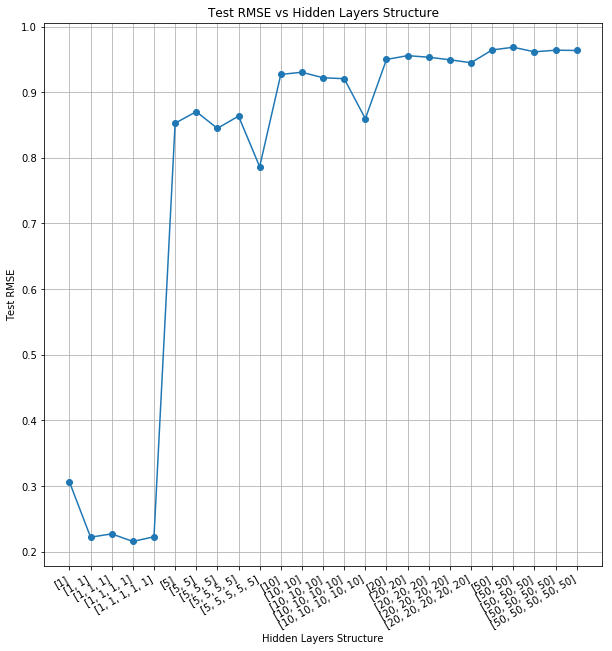

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(shape_test_accuracy, 'o-')
plt.title("Test RMSE vs Hidden Layers Structure")
plt.ylabel('Test RMSE')
plt.xticks(range(len(shape_test_accuracy)), n_hiddens_by_layer_test_values, rotation=30, horizontalalignment='right')
plt.xlabel('Hidden Layers Structure')
plt.grid(True)

In [10]:
best_index = np.argmax(shape_test_accuracy)
best_shape = shape_test_accuracy[best_index]
print('best shape:', n_hiddens_by_layer_test_values[best_index], "with", best_shape, "success")


best shape: [50, 50] with 0.9684 success


The single unit layers perform really poorly since they can't capture the complexity of the number's image. After that, the performance increases with each layer. It doesn't seem to care how many layers there are however. For 5 and 10 units, there are dips in performance. I guess too many layers leads to overfitting or maybe the vanishing gradient problem.

## Required Section 2: Convolutional Networks (40 points)

1. (15 points) Using `batch_size` of 100, `learning_rate` of 0.001, `n_hiddens_by_layer` of `[20, 20, 20]`, `n_iterations` of 10, `n_conv_layers` of 2, and try several values of `windows` and of `strides`, and plot the percent of testing data correctly classified versus `windows` and `strides`.

2. (15 points) Try several more variations of `n_hiddens_by_layer`, `n_iterations`, `n_conv_layers`, `windows` and `strides`. 

3. (10 points) Describe what you see in your plots in 1., and the variations you see in 2. with at least two sentences for each.

### Part 1

In [12]:
def run21(windows, strides):
    nnet = NeuralNetworkClassifier_Pytorch(
        n_inputs=1,
        n_hiddens_by_layer=[20, 20, 20],
        n_outputs=10,
        #relu=,
        #gpu=,
        n_conv_layers=2,
        windows=windows,
        strides=strides,
        input_height_width=28,
    )
    nnet.train(
        Xtrain=Xtrain,
        Ttrain=Ttrain,
        Xtest=Xtest,
        Ttest=Ttest,
        n_iterations=10,
        batch_size=100,
        learning_rate=0.001,
    )
    return nnet

windows_values = [[5, 7], [3, 4], [15, 10]]
strides_values = [[1, 2], [2, 2], [1, 3]]
wind_strid_config = []
wind_strid_accuracy = []
for windows in windows_values:
    for strides in strides_values:
        print('(windows, strides):', (windows, strides))
        nnet = run21(windows, strides)
        Ytest, _, _ = nnet.use(Xtest)
        #Ytest = Ttest # DEBUG
        num_correct = np.sum(Ytest == Ttest)
        wind_strid_config.append((windows, strides))
        wind_strid_accuracy.append(num_correct / Ytest.shape[0])

(windows, strides): ([5, 7], [1, 2])
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 0.4956, acc = 95.71
Iteration 2, cost = 0.1360, acc = 97.23
Iteration 3, cost = 0.0875, acc = 98.02
Iteration 4, cost = 0.0654, acc = 98.10
Iteration 5, cost = 0.0514, acc = 98.10
Iteration 6, cost = 0.0415, acc = 97.97
Iteration 7, cost = 0.0367, acc = 98.14
Iteration 8, cost = 0.0337, acc = 98.09
Iteration 9, cost = 0.0311, acc = 98.16
Iteration 10, cost = 0.0263, acc = 98.27
(windows, strides): ([5, 7], [2, 2])
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 0.6196, acc = 93.49
Iteration 2, cost = 0.1998, acc = 95.86
Iteration 3, cost = 0.1312, acc = 96.65
Iteration 4, cost = 0.0992, acc = 97.21
Iteration 5, cost = 0.0800, acc = 97.49
Iteration 6, cost = 0.0673, acc = 97.69
Iteration 7, cost = 0.0578, acc = 97.82
Iteration 8, cost = 0.0499, acc = 97.73
Iteration 9, cost = 0.0433, acc = 97.84
Iteration 10, cost = 0.0376, acc = 97.91
(windows, strides): ([5, 7], [

RuntimeError: Calculated padded input size per channel: (7 x 7). Kernel size: (10 x 10). Kernel size can't be greater than actual input size at /Users/soumith/b101_2/2019_02_08/wheel_build_dirs/wheel_3.6/pytorch/aten/src/THNN/generic/SpatialConvolutionMM.c:50

The program errored out after this ran, but I collected enough data that I'm fine with what it collected. Convolusional neural networks took really long to run, so I decided not to run it again.

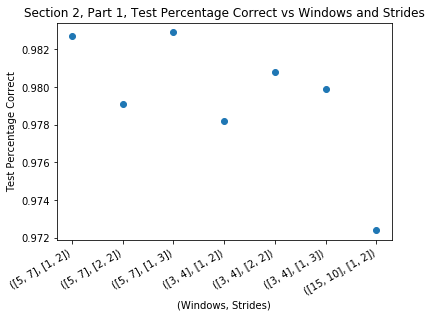

In [25]:
plt.title('Section 2, Part 1, Test Percentage Correct vs Windows and Strides')
plt.xlabel('(Windows, Strides)')
plt.ylabel('Test Percentage Correct')
plt.xticks(range(len(wind_strid_config)), wind_strid_config, rotation=30, horizontalalignment='right')
plt.plot(wind_strid_accuracy, 'o');

In [39]:
bi = np.argmax(wind_strid_accuracy)
best_windows, best_strides = wind_strid_config[bi]
print('best windows:', best_windows)
print('best strides:', best_strides)
print('accuracy:',wind_strid_accuracy[bi] )

best windows: [5, 7]
best strides: [1, 3]
accuracy: 0.9829


The performance in general larger than the 
traditional network. This has to do with the location of the number not always being exactly centered.
If the "center" of the numbers could be found and all the images were normalized, I imagine the performance would be similar. However, given the lower performance of the larger window, this might not be the case. Convolution nets have the bonus of focusing on small parts of the number. The larger windows probably have a hard time capturing the complexity of having more features being inside the window.

As for strides, there seems to be dips when the first layer is something other than 1 when the window is large enough. For a smaller window, the performance increases with larger strides for the first layer. In both cases, the performance increased for having larger strides in the second layer. This might have to do with the data in the second layer being more reduced in dimension, so it doesn't need to try from so many different positions since it's simplified enough. 


### Part 2

In [19]:
def run22(n_hiddens_by_layer, n_iterations, n_conv_layers, windows, strides):
    nnet = NeuralNetworkClassifier_Pytorch(
        n_inputs=1,
        n_hiddens_by_layer=n_hiddens_by_layer,
        n_outputs=10,
        #relu=,
        #gpu=,
        n_conv_layers=n_conv_layers,
        windows=windows,
        strides=strides,
        input_height_width=28,
    )
    nnet.train(
        Xtrain=Xtrain,
        Ttrain=Ttrain,
        Xtest=Xtest,
        Ttest=Ttest,
        n_iterations=n_iterations,
        batch_size=100,
        learning_rate=0.001,
    )
    return nnet

n_hiddens_by_layer_values = [[50, 20, 10], [100, 20], [10, 10, 10, 10, 10]]
n_iterations_values = [25, 10, 15]
n_conv_layers_values = [1, 1, 4]
windows_values = [[10], [25], [4, 2, 2, 2]]
strides_values = [[2], [1], [1, 2, 1, 1]]

pairs = list(zip(n_hiddens_by_layer_values, n_iterations_values, n_conv_layers_values, windows_values, strides_values))
full_accuracy = []
for pair in pairs:

    print('(n_hiddens_by_layer, n_iterations, n_conv_layers, windows, strides):', pair)
    nnet = run22(*pair)
    Ytest, _, _ = nnet.use(Xtest)
    #Ytest = Ttest  # DEBUG
    num_correct = np.sum(Ytest == Ttest)
    full_accuracy.append(num_correct / Ytest.shape[0])

(n_hiddens_by_layer, n_iterations, n_conv_layers, windows, strides): ([50, 20, 10], 25, 1, [10], [2])
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 2, cost = 0.3377, acc = 94.42
Iteration 4, cost = 0.1525, acc = 96.66
Iteration 6, cost = 0.1049, acc = 96.82
Iteration 8, cost = 0.0797, acc = 97.38
Iteration 10, cost = 0.0703, acc = 97.06
Iteration 12, cost = 0.0592, acc = 97.50
Iteration 14, cost = 0.0494, acc = 97.52
Iteration 16, cost = 0.0486, acc = 97.66
Iteration 18, cost = 0.0410, acc = 97.72
Iteration 20, cost = 0.0357, acc = 97.48
Iteration 22, cost = 0.0396, acc = 97.60
Iteration 24, cost = 0.0298, acc = 97.93
(n_hiddens_by_layer, n_iterations, n_conv_layers, windows, strides): ([100, 20], 10, 1, [25], [1])
NeuralNetworkClassifier_Pytorch created on cpu
Iteration 1, cost = 0.5930, acc = 91.76
Iteration 2, cost = 0.2534, acc = 94.43
Iteration 3, cost = 0.1769, acc = 95.78
Iteration 4, cost = 0.1380, acc = 96.00
Iteration 5, cost = 0.1145, acc = 96.90
Iteration 6, cost

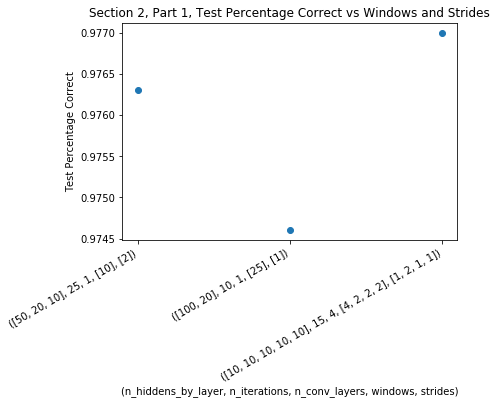

In [26]:
plt.title('Section 2, Part 1, Test Percentage Correct vs Windows and Strides')
plt.xlabel('(n_hiddens_by_layer, n_iterations, n_conv_layers, windows, strides)')
plt.ylabel('Test Percentage Correct')
plt.xticks(range(len(pairs)), pairs, rotation=30, horizontalalignment='right')
plt.plot(full_accuracy, 'o');

In [40]:
bi = np.argmax(full_accuracy)
best_pair = pairs[bi]
print('best combination:')
names = ("n_hiddens_by_layer", "n_iterations", "n_conv_layers", "windows", "strides")
for name, param  in zip(names, pair):
    print(name+":", param)
print('accuracy:', full_accuracy[bi])

best combination:
n_hiddens_by_layer: [10, 10, 10, 10, 10]
n_iterations: 15
n_conv_layers: 4
windows: [4, 2, 2, 2]
strides: [1, 2, 1, 1]
accuracy: 0.977


The first network is supposed to be pretty large but only have one convolutional layer with large window and strides. Similar to before, it didn't perform nearly as well as the best case in the last one. It could be due to the overfitting of having too many iterations, the larger stride, or the large window.

The second network performed really poorly. This is due to a short network where the 100 might be too large to capture any patterns, and the window is too large to help with this. While the window is large, I was hoping that that more units would combat the large window, but it didn't seem to work.

The third network performed the best. I wanted this to have lots of convolutional layers but have small windows and strides for each of them. It seemed to capture some patterns, but it still performs worse than part 1's best. This might be because the network is too small or the windows are too small.

Overall, the performance is better than the normal networks pretty consistently, even these bad networks.

## Required Section 3: Cost and Acc (20 points)

In the output from the `train` function we see two values, one called `cost` and one called `acc`.  What is the meaning of each and why are their
values so different?  Study the code to help you answer this question.

**ANSWER:**  (20 points) 
The algorithm is trying to minimize an objective function. The value of this objective function is called the cost,
so from the training algorithm. Here are all the important lines:

    loss = torch.nn.CrossEntropyLoss(reduction='mean')
    for i in range(n_iterations):
        cost = 0.
        num_batches = n_examples // batch_size
        for k in range(num_batches):
            output = loss.forward(Y, Ttrain_batch)
            cost += output.item()
        if (i + 1) % print_every == 0:
            print('Iteration {:d}, cost = {:.4f}, acc = {:.2f}'.format(i + 1, cost / num_batches, 100. * np.mean(classes == Ttest)))

The cost is reset for every iteration, and the cost is calculated for some number of batches and accumulated in the
cost variable. Therefore, the cost number represents the average cost per batch for that iteration.

The cross entropy is calculated by the following formula (according to wikipedia):

$$
H(p, q) = - \sum_{x \in X} p(x) \log q(x)
$$

where $x$ is the class, $X$ is the set of possible classes, $p$ is the actual probability distribution, and $q$ is the model's approximation of this distribution, and $H$ is the loss. The model's approximation of the distribution is the softmax of its output matrix, and this is calculated for each prediction. Since we have the true labels and know what it should be, $p$ is a boring distribution which always equals 1 for the class of the data point and 0 otherwise. Therefore, our equation simplifies to  

$$
H(p, q) = - \log q(x)
$$

where $x$ is the true class of the data point. $-\log q$ is a decreasing function with $q$. $q$ increases as the model becomes more accurate (predicts high probabilities for the true class). Since $q$ is a probability distribution, it has a domain of $[0, 1]$, and $\log [0, 1] = (-\infty, 0]$. Therefore, as the model becomes more accurate, $q$ increases, and the $\log$ approaches zero. Thus, the loss also converges to zero when summed over a set of predictions, i.e., in the iteration. 

Cross entropy has the added bonus of taking the confidence of the model into account. Even if the model predicts correctly, if it's probability was 50%, we could still have a loss greater than 0 since it should be 100%. This might suggest that loss is a better measurement of innacuracy (see below). Below, I found that loss is still high even though accuracy can still be strong.

The accuracy is calculated from this piece of code: `100. * np.mean(classes == Ttest)`. `classes` represents the 
class predictions after the iteration. `classes == Ttest` will return an array of booleans. `np.mean` will count the 
`True`'s (since they equal 1 and it sums the `True`'s) and divide them by the number of predictions in the class 
resulting in the percent accuracy (in decimal form). It's multiplied by 100 to convert it to percentage of correct 
predictions.

In summary, while both loss and accuracy represent the same thing, the correctness of the model, loss is what we are trying to optimize and roughly measures the models incorrectness (lower is better), and accuracy is a measure of accuracy (how often it is correct, higher is better). Also, loss could still be non zero if the model predicts perfectly since it takes into account when the model isn't 100% confident. 

Everything below is some experimenting I did because I was curious. I wanted to show that cost can be high if the model is just guessing the most common class. *You don't have to read it since it's not really part of the assignment.*

In [22]:
N = 10000
split = .95
test_train_split = .7
test_train_splitN = int(N * test_train_split)
splitN = int(N*split)
XTest = np.random.rand(N, 4) # already random so no need to shuffle
TTest = np.ones(N)
TTest[splitN:] = 0
np.random.shuffle(TTest)

XtrainTest=XTest[:test_train_splitN, None, :].reshape(-1, 1, 2, 2)
TtrainTest=TTest[:test_train_splitN]
XtestTest=XTest[test_train_splitN:, None, :].reshape(-1, 1, 2, 2)
TtestTest=TTest[test_train_splitN:]
# This represents a random distribution of 95% class 1 and 5% class 0. p(1) = .95 and p(0) = .5

nnet = NeuralNetworkClassifier_Pytorch(
    n_inputs=4,
    n_hiddens_by_layer=[10, 10],
    n_outputs=2
)
nnet.train(
    Xtrain=XtrainTest,
    Ttrain=TtrainTest,
    Xtest=XtestTest,
    Ttest=TtestTest,
    n_iterations=100,
    batch_size=100,
    learning_rate=0.001
)

def calc_classes_from_prob(prob):
    prob, _ = prob # get prob of 0, should be near 0.05
    if np.random.rand() > prob:
        return 1
    else:
        return 0
    

print("shape of X and T test")
print(XtestTest.shape, TtestTest.shape)
classes, probs, _ = nnet.use(XtestTest)
real_classes = [calc_classes_from_prob(prob) for prob in probs]
print('distribution of q (model) for testing set')
q = np.mean(probs, axis=0)
print(q)
print('distribution of p (actual) for testing set')
p = np.array([1- np.mean(TtestTest), np.mean(TtestTest)])
print(p)
print('distribution ')
print('accuracy using max prob:', np.mean(classes==TtestTest))

NeuralNetworkClassifier_Pytorch created on cpu
Iteration 10, cost = 0.1988, acc = 94.93
Iteration 20, cost = 0.1984, acc = 94.93
Iteration 30, cost = 0.1982, acc = 94.93
Iteration 40, cost = 0.1981, acc = 94.93
Iteration 50, cost = 0.1980, acc = 94.93
Iteration 60, cost = 0.1979, acc = 94.93
Iteration 70, cost = 0.1979, acc = 94.93
Iteration 80, cost = 0.1979, acc = 94.93
Iteration 90, cost = 0.1979, acc = 94.93
Iteration 100, cost = 0.1979, acc = 94.93
shape of X and T test
(3000, 1, 2, 2) (3000,)
distribution of q (model) for testing set
[0.0495176  0.95048267]
distribution of p (actual) for testing set
[0.05066667 0.94933333]
distribution 
accuracy using max prob: 0.9493333333333334


From these results, we can see that the accuracy is really high 95.7%, and the model's approximation of the distribution is right, but the cost is really high compared to values for actually correlated data (e.g., 0.0xxx).

If we sample from the distribution to select our class (as opposed to just choosing the maximum, we can see our accuracy drop. This is more interesting than relavent to this discussion.

In [23]:
accs = []
n=100
for _ in range(n):
    real_classes = [calc_classes_from_prob(prob) for prob in probs]
    acc = np.mean(real_classes == TtestTest)
    accs.append(acc)

print('mean accuracy sampling from q (n={}): {}'.format(n, np.mean(accs)))

mean accuracy sampling from q (n=100): 0.90511


To calculate the actual cost of the testing set, we have to do it manually:


$$
\begin{align*}
H(p, q) &= - \sum_{x \in X} p(x) \log q(x) \\
&= -\log(\prod_{x \in X}q(x)^{p(x)})
\end{align*}
$$

in the cost calculation p(x) = 1 if $x$ is the right class, so

$$
\begin{align*}
H(p, q) &= -\log(\prod_{x \in X}q(x)^{p(x)}) \\
&= -\log(q(x))
\end{align*}
$$

where $x$ is the correct class. This can be used to calculate the cost of the testing set `Ttest` given `probs` from
`nnet.use(Xtest)`. (This assumes Ttest's value is the index of the class in probs; easily
the case, but worth noting).

    cost = np.mean(-np.log(probs[:, Ttest.astype(int)]))

In [24]:
cost = np.mean(np.sum(-p * np.log(probs), axis=1))
obj_cost = np.mean(-np.log(probs[:, TtestTest.astype(int)]))
print('actual cost:', cost)
print('objective function cost:', obj_cost)

actual cost: 0.2005197196711566
objective function cost: 0.20051944


Something I wasn't expecting, the values are nearly identical. Not sure why this is.. One thing we do know is that the cost is high despite the accuracy being really good.

Something I'm wondering is that the high cost despite perfectly capturing the distribution is due to the fact
that T is a random variable as opposed to having p(x) = 1 given X. I'm not a statisititian, so I don't know how to figure this out.